# Artificial Neural Networks from scratch

Artificial Neural Networks or 'ANNs' are data structures that aim to solve complex computational problems that are often infeasible to solve using traditional algorithms. ANNs take inspiration from the structure of the biological animal brain. The fundamental unit of the brain is a neuron. An 'artificial neuron' is designed to loosely model a biological neuron and forms the fundamental unit of an ANN. 

In this notebook, I attempt to model, train, and test some of the fundamental structures of ANNs from scratch using only the NumPy library and the Matplotlib library to plot the results.

## The Perceptron
The perceptron is one of the simplest forms of artificial neurons in the family of feed-forward neural networks. It is the precursor to the modern artificial neuron. Just by itself, a single perceptron can be used as a linear model to perform binary classifications.

<img src="https://images.deepai.org/glossary-terms/perceptron-6168423.jpg" width=500>

It performs a weighted sum of the given input vector and passes the sum through the Heaviside step function. Lets take a look at a simple implementation of a perceptron as a Python class.

```python
class Perceptron:
    def __init__(self, nu, weights, bias):
        self.nu = nu # Learning Rate
        self.weights = np.array(weights)
        self.bias = bias
        # Activation Function: Heaviside step function
        self.activation = lambda x: np.where(x>0, 1, 0) if isinstance(x, np.ndarray) else (1 if x>0 else 0)
```
The output of the Heaviside step function (1 or 0), determines the classification.
```python
    def classify(self, X):
        fx = np.dot(X, self.weights) + self.bias
        gfx = self.activation(fx)
        return gfx
```

Let's demonstrate the working of this perceptron by training it on some sample data. I will set the size of the input vector to 2, to make it easy to visualize on an XY plane.

`X = < x_1 , x_2 >`

I use the Numpy random number generator to generate a set of randomized input vectors and classify them using a pre-set ground truth vector. Using a pre-set ground truth vector ensures that the data is linearly separable. The goal of the perceptron learning algorithm is to find this 'ground truth' from the generated dataset.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from annelements.perceptron import Perceptron
from annelements.functions import std_to_pts

N_DIMS = 2
GROUND_TRUTH = np.array([2., 1.])
GROUND_TRUTH_BIAS = -100.

N_DATA = 50
X_RANGE = np.array([-100., 100.])

N_DATA_TEST = 500
X_RANGE_TEST = np.array([-1000., 1000.])

rng = np.random.default_rng()
X = rng.uniform(*X_RANGE, (N_DATA, N_DIMS))
y = np.where(
    np.dot(X, GROUND_TRUTH) + GROUND_TRUTH_BIAS > 0,    # Condition
    1,  # Truth value
    0   # False value
)

Let's visualize the generated dataset.  

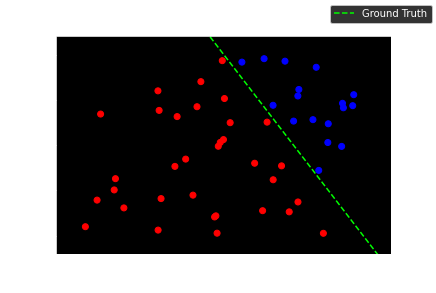

In [2]:
fig, ax = plt.subplots()

col = np.where(y==0, 'r', 'b')
ax.scatter(X[:,0], X[:,1], c=col)

truth_line = ax.plot(
    *std_to_pts(*GROUND_TRUTH, GROUND_TRUTH_BIAS, ref=(X_RANGE * 1.2)),
    linestyle='dashed',
    label="Ground Truth",
    c='#00ff00'
)

ax.set_xlim(*(X_RANGE * 1.2))
ax.set_ylim(*(X_RANGE * 1.2))
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
fig.legend()
plt.show()


I will now initialize a perceptron with some arbitrary weights and a bias. In a 2D input space, we can use a straight line to visualize this perceptron. A straight line that divides the space into two parts.

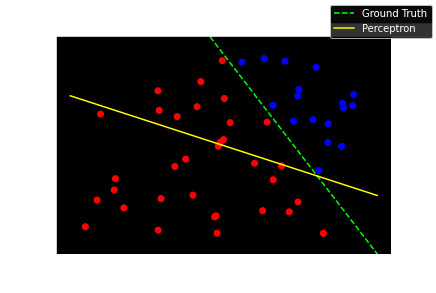

In [3]:
perceptron = Perceptron(nu= 0.01, weights=[1., 2.], bias=1.)

perceptron_line = ax.plot(
    *std_to_pts(*perceptron.weights, perceptron.bias, ref=(X_RANGE * 1.1)),
    label="Perceptron",
    c='#ffff00'
)[0]
fig.legend()
fig

After creating a perceptron, we need to train it on the data. To do this, we use the perceptron learning algorithm. It is a simple algorithm that incrementally tweaks the weights and bias of the perceptron until it fits the data.  
```python
    def learn(self, X, y):
        _, dims = X.shape
        self.weights = np.ones(dims)
        self.bias = 0
        
        y_pred = self.classify(X)
        misclassifications = y_pred != y
        while np.any(misclassifications):
            for i, x_i in enumerate(X):
                if misclassifications[i]:
                    delta = self.nu * (y[i] - y_pred[i])
                    self.weights += delta * x_
                    self.bias += delta

            y_pred = self.classify(X)
            misclassifications = y_pred != y
```
This learning algorithm runs indefinitely until all the data is correctly classified. It assumes that the data is strictly linearly separable. While dealing with real-world data, this is not always the case. If there is a possibility of outliers, an alternative algorithm that runs for a fixed number of iterations would be more suitable.

Learned Weights: [2.8472845  0.94807751], Learned Bias:-113.06000000002093
Ground Truth: [2. 1.], True Bias: -100.0


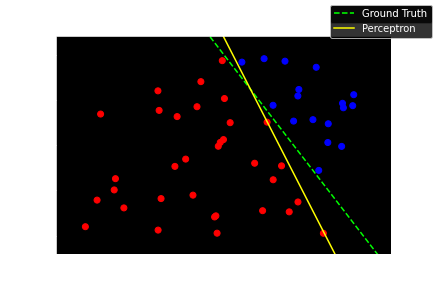

In [4]:
perceptron.learn(X, y)
perceptron_line.set_data(*std_to_pts(*perceptron.weights, perceptron.bias, ref=(X_RANGE * 1.1)))
print("Learned Weights: {}, Learned Bias:{}".format(perceptron.weights, perceptron.bias))
print("Ground Truth: {}, True Bias: {}".format(GROUND_TRUTH, GROUND_TRUTH_BIAS))
fig

The figure above shows a perceptron that has trained on the given data. It accurately classifies the entire training data, but what about new data that it hasn't seen before? Let's create a test dataset using the same ground truth and evaluate our perceptron against it.

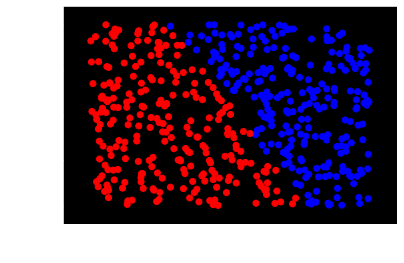

In [5]:
X_test = rng.uniform(*X_RANGE_TEST, (N_DATA_TEST, N_DIMS))
y_test = np.where(
    np.dot(X_test, GROUND_TRUTH) + GROUND_TRUTH_BIAS > 0,    # Condition
    1,  # Truth value
    0   # False value
)

fig2, ax2 = plt.subplots()

col = np.where(y_test==0, 'r', 'b')
ax2.scatter(X_test[:,0], X_test[:,1], c=col)

ax2.set_xlim(*(X_RANGE_TEST * 1.2))
ax2.set_ylim(*(X_RANGE_TEST * 1.2))
ax2.set_xlabel("x_1")
ax2.set_ylabel("x_2")
plt.show()

Accuracy: 0.976


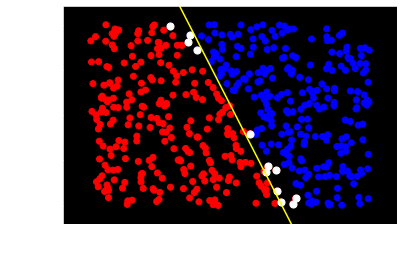

In [6]:
perceptron_line = ax2.plot(
    *std_to_pts(*perceptron.weights, perceptron.bias, ref=(X_RANGE_TEST * 1.1)),
    label="Perceptron",
    c='#ffff00'
)[0]
y_test_predicted = perceptron.classify(X_test)
misclassifications = y_test_predicted != y_test
ax2.scatter(X_test[misclassifications][:,0], X_test[misclassifications][:,1], c='w', s=50)
accuracy = np.count_nonzero(y_test_predicted == y_test)/N_DATA_TEST
print("Accuracy: {}".format(accuracy))
fig2